## Task 1: Preprocess and Explore the Data

### Step 1: Data Extraction and Initial Cleaning

Data Overview:
                                TSLA        BND         SPY
Date                                                       
2015-07-01 00:00:00-04:00  17.943333  60.816753  174.917145
2015-07-02 00:00:00-04:00  18.667999  60.967113  174.756927
2015-07-06 00:00:00-04:00  18.648001  61.177578  174.259583
2015-07-07 00:00:00-04:00  17.858667  61.237743  175.355453
2015-07-08 00:00:00-04:00  16.997334  61.410618  172.413498

Missing values per asset:
TSLA    0
BND     0
SPY     0
dtype: int64

Descriptive statistics:
              TSLA          BND          SPY
count  2535.000000  2535.000000  2535.000000
mean    131.963002    68.469189   334.193732
std     120.914904     4.554602   126.427704
min       9.578000    60.779144   155.869797
25%      18.967667    64.654373   230.083191
50%      94.571335    67.604866   305.264465
75%     236.761665    71.891144   420.350494
max     479.859985    77.318207   637.099976


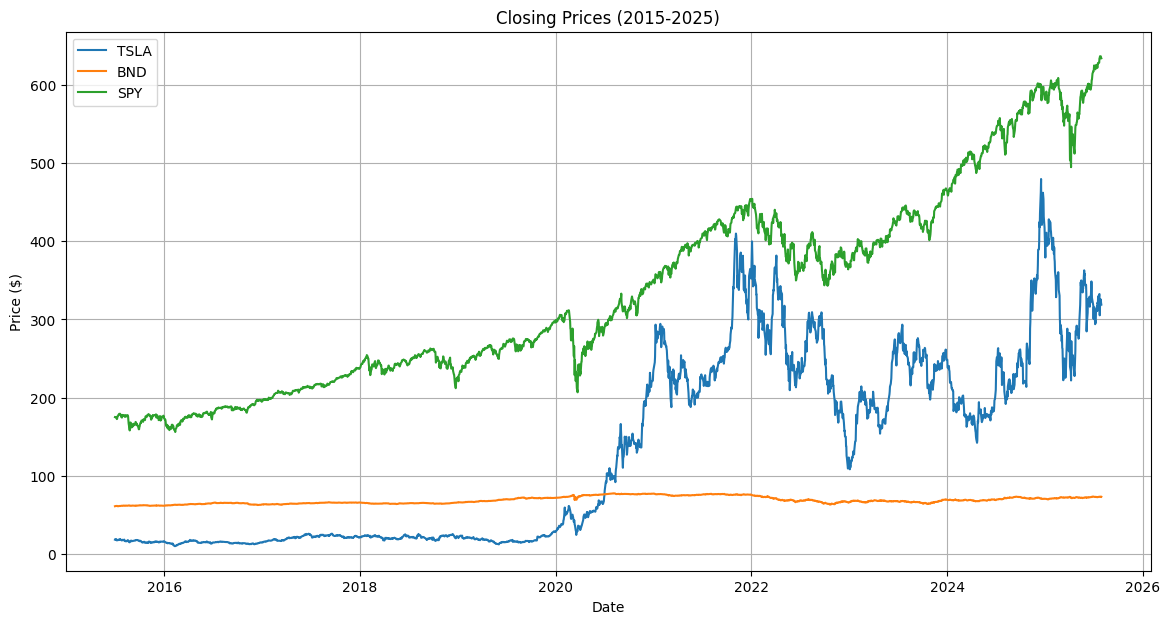

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to safely download stock data
def get_stock_data(ticker, start_date, end_date):
    try:
        stock = yf.Ticker(ticker)
        hist = stock.history(start=start_date, end=end_date)
        return hist['Close']  # Use 'Close' if 'Adj Close' fails
    except Exception as e:
        print(f"Error downloading {ticker}: {e}")
        return None

# Fetch historical data for each ticker
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'

# Create empty DataFrame to store closing prices
closing_prices = pd.DataFrame()

for ticker in tickers:
    prices = get_stock_data(ticker, start_date, end_date)
    if prices is not None:
        closing_prices[ticker] = prices

# Check if we got data
if closing_prices.empty:
    raise ValueError("Failed to download any data. Please check your internet connection and try again.")

# Handle missing data
closing_prices.ffill(inplace=True)  # Forward fill
closing_prices.bfill(inplace=True)  # Backward fill if needed

# Basic statistics
print("Data Overview:")
print(closing_prices.head())
print("\nMissing values per asset:")
print(closing_prices.isnull().sum())
print("\nDescriptive statistics:")
print(closing_prices.describe())

# Plot the data
plt.figure(figsize=(14, 7))
for ticker in closing_prices.columns:
    plt.plot(closing_prices.index, closing_prices[ticker], label=ticker)
plt.title('Closing Prices (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

### Step 2: Exploratory Data Analysis (EDA)

[*********************100%***********************]  3 of 3 completed


Data columns structure:
MultiIndex([( 'Close',  'BND'),
            ( 'Close',  'SPY'),
            ( 'Close', 'TSLA'),
            (  'High',  'BND'),
            (  'High',  'SPY'),
            (  'High', 'TSLA'),
            (   'Low',  'BND'),
            (   'Low',  'SPY'),
            (   'Low', 'TSLA'),
            (  'Open',  'BND'),
            (  'Open',  'SPY'),
            (  'Open', 'TSLA'),
            ('Volume',  'BND'),
            ('Volume',  'SPY'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])


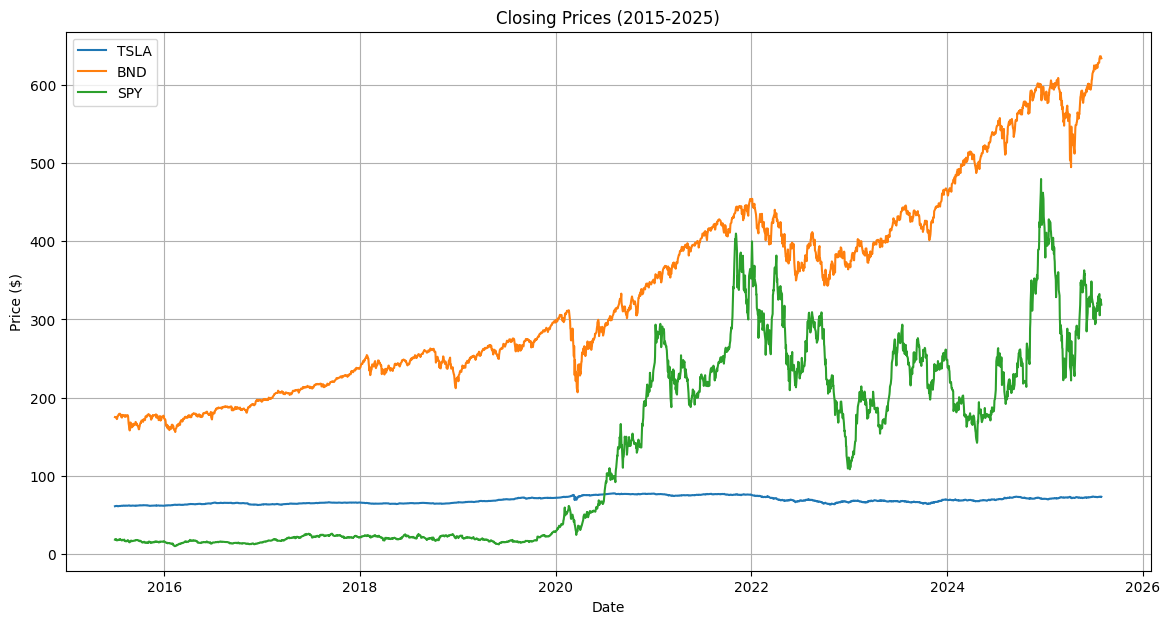

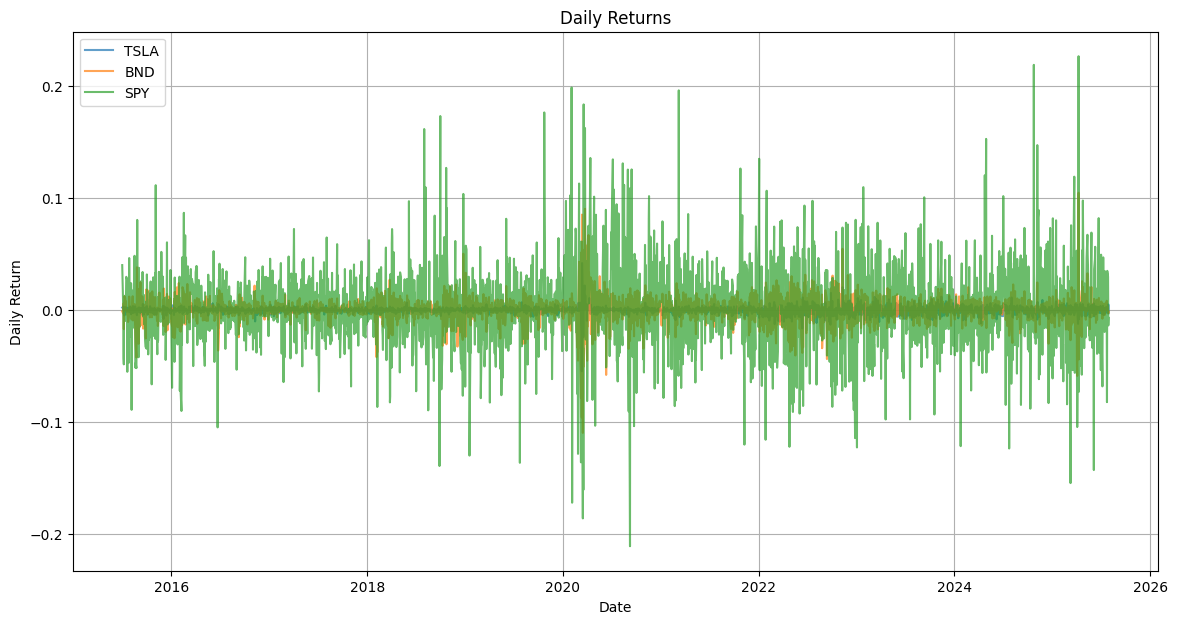

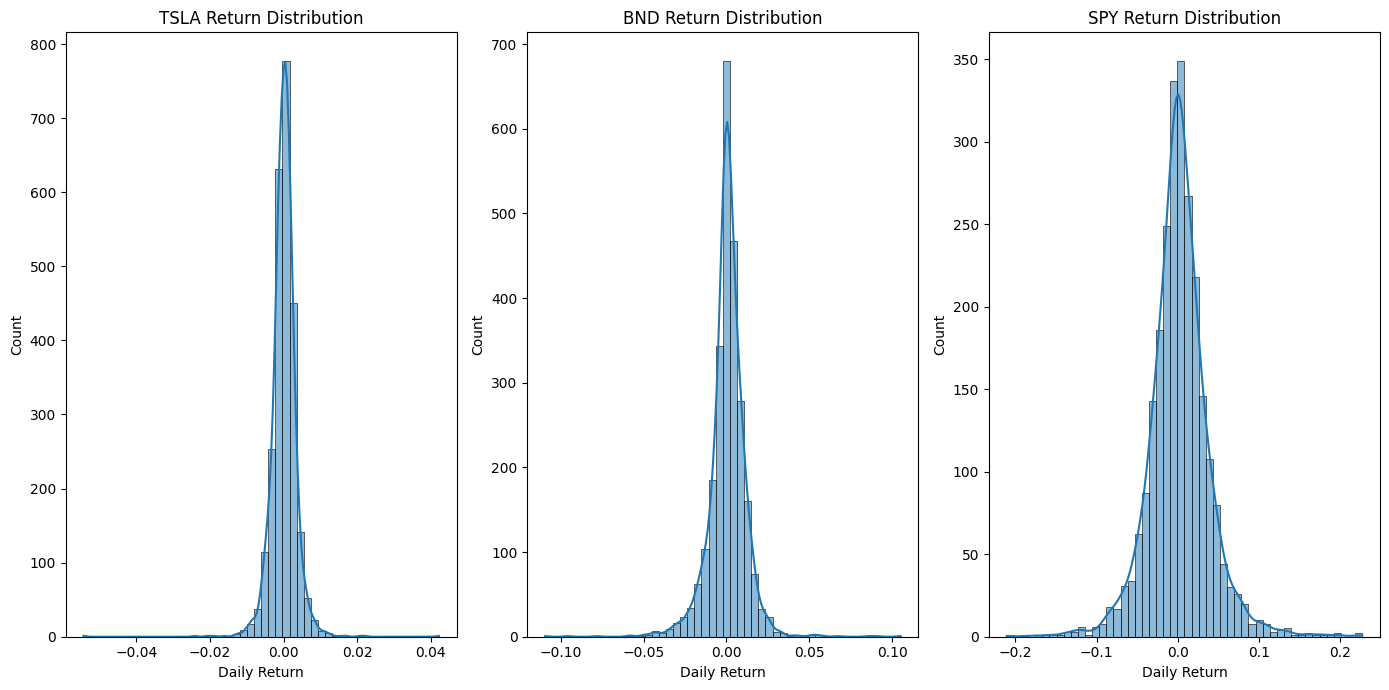

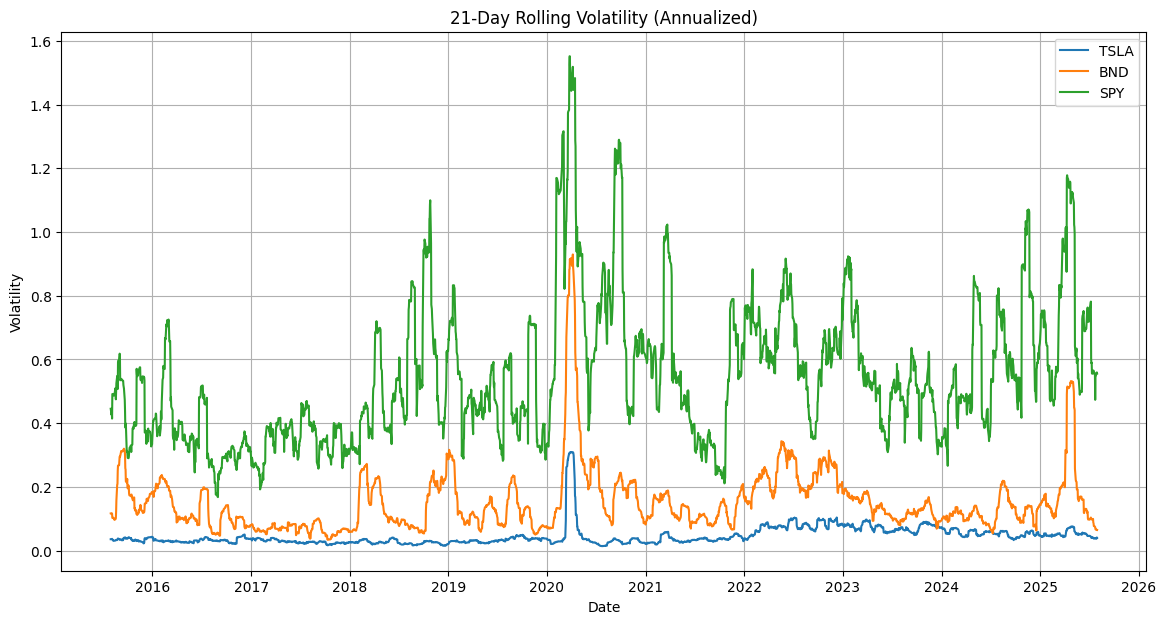

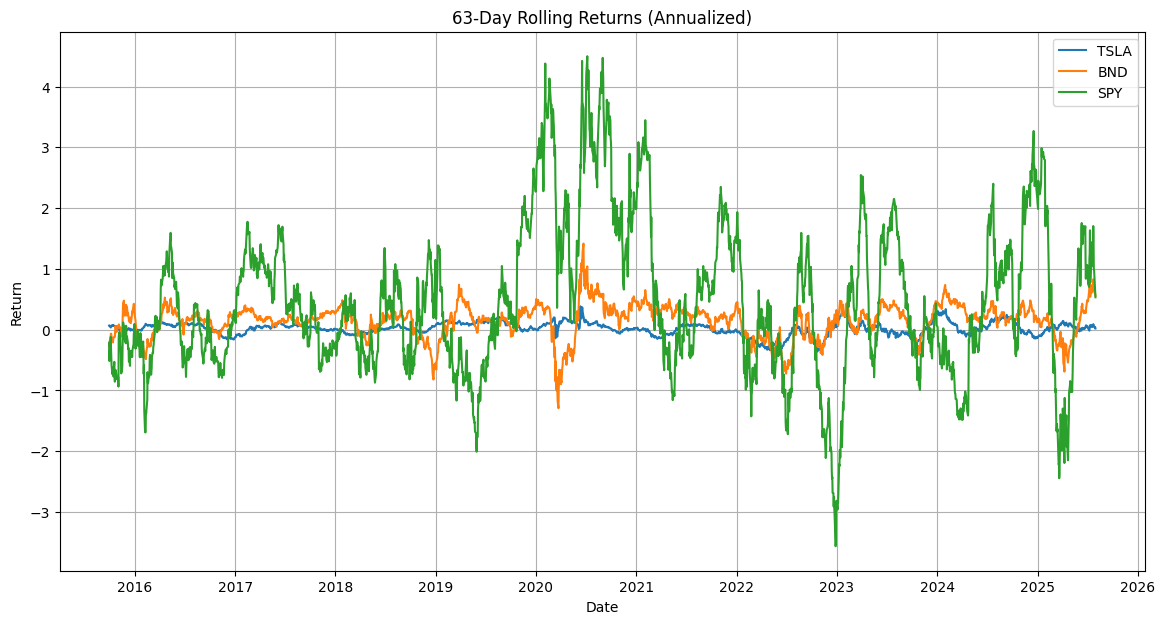

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Fetch historical data - updated approach
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'

# Download all data
data = yf.download(tickers, start=start_date, end=end_date)

# Check the structure of the downloaded data
print("Data columns structure:")
print(data.columns)

# Extract closing prices - handles MultiIndex properly
if isinstance(data.columns, pd.MultiIndex):
    # New yfinance format with MultiIndex
    closing_prices = data['Close'].copy()
    closing_prices.columns = tickers  # Simplify column names
else:
    # Old format
    closing_prices = data[[f'{ticker}.Close' for ticker in tickers]].copy()
    closing_prices.columns = tickers

# Plot closing prices
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(closing_prices.index, closing_prices[ticker], label=ticker)
plt.title('Closing Prices (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate daily returns
returns = closing_prices.pct_change().dropna()

# Plot daily returns
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(returns.index, returns[ticker], label=ticker, alpha=0.7)
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# Plot return distributions
plt.figure(figsize=(14, 7))
for i, ticker in enumerate(tickers):
    plt.subplot(1, 3, i+1)
    sns.histplot(returns[ticker], kde=True, bins=50)
    plt.title(f'{ticker} Return Distribution')
    plt.xlabel('Daily Return')
plt.tight_layout()
plt.show()

# Calculate and plot rolling volatility (21-day window)
plt.figure(figsize=(14, 7))
for ticker in tickers:
    rolling_vol = returns[ticker].rolling(window=21).std() * np.sqrt(252)  # Annualized
    plt.plot(rolling_vol.index, rolling_vol, label=ticker)
plt.title('21-Day Rolling Volatility (Annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot rolling returns (63-day window)
plt.figure(figsize=(14, 7))
for ticker in tickers:
    rolling_return = returns[ticker].rolling(window=63).mean() * 252  # Annualized
    plt.plot(rolling_return.index, rolling_return, label=ticker)
plt.title('63-Day Rolling Returns (Annualized)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

### Step 3: Stationarity Testing and Volatility Analysis

[*********************100%***********************]  3 of 3 completed



Stationarity test for TSLA closing prices:
Results of Dickey-Fuller Test:
Test Statistic                   -1.536246
p-value                           0.515511
#Lags Used                       13.000000
Number of Observations Used    2521.000000
Critical Value (1%)              -3.432947
Critical Value (5%)              -2.862687
Critical Value (10%)             -2.567381
dtype: float64

Stationarity test for TSLA returns:
Results of Dickey-Fuller Test:
Test Statistic                -9.889801e+00
p-value                        3.583037e-17
#Lags Used                     2.300000e+01
Number of Observations Used    2.510000e+03
Critical Value (1%)           -3.432958e+00
Critical Value (5%)           -2.862692e+00
Critical Value (10%)          -2.567383e+00
dtype: float64

Risk Metrics:
      Annual Return  Annual Volatility  Sharpe Ratio  VaR (95%)
TSLA       0.019599           0.054919      0.356880  -0.004900
BND        0.144844           0.182407      0.794072  -0.017195
SPY        

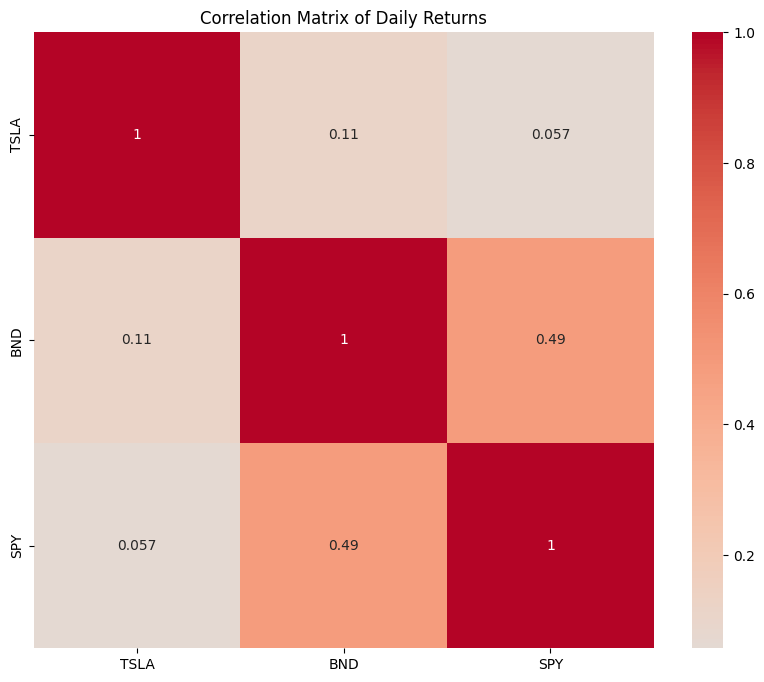

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Fetch historical data
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'

# Download all data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract closing prices (handles MultiIndex properly)
closing_prices = data['Close'].copy() if isinstance(data.columns, pd.MultiIndex) else data[[f'{t}.Close' for t in tickers]].copy()
closing_prices.columns = tickers  # Standardize column names

# Calculate daily returns
returns = closing_prices.pct_change().dropna()

# Stationarity tests
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

print("\nStationarity test for TSLA closing prices:")
test_stationarity(closing_prices['TSLA'].dropna())

print("\nStationarity test for TSLA returns:")
test_stationarity(returns['TSLA'].dropna())

# Calculate risk metrics
def calculate_risk_metrics(returns_df):
    metrics = {}
    for ticker in returns_df.columns:
        ret = returns_df[ticker]
        metrics[ticker] = {
            'Annual Return': ret.mean() * 252,
            'Annual Volatility': ret.std() * np.sqrt(252),
            'Sharpe Ratio': ret.mean() / ret.std() * np.sqrt(252),
            'VaR (95%)': np.percentile(ret, 5)
        }
    return pd.DataFrame(metrics).T

risk_metrics = calculate_risk_metrics(returns)
print("\nRisk Metrics:")
print(risk_metrics)

# Outlier detection
def detect_outliers(returns_df, threshold=3):
    outliers = {}
    for ticker in returns_df.columns:
        z_scores = (returns_df[ticker] - returns_df[ticker].mean()) / returns_df[ticker].std()
        outliers[ticker] = returns_df[ticker][abs(z_scores) > threshold]
    return outliers

outliers = detect_outliers(returns)
print("\nOutliers in returns:")
for ticker, outlier_data in outliers.items():
    print(f"\n{ticker}:")
    print(outlier_data)

# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Daily Returns')
plt.show()